<a href="https://colab.research.google.com/github/kaif0312/ArcanaHackathon/blob/main/PortfolioAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
#from nsepy import get_history as gh
plt.style.use('fivethirtyeight') #setting matplotlib style


In [2]:
df = pd.read_csv('/content/drive/MyDrive/BESTCOMPANIES/AAPL.csv')
df2 = pd.read_csv('/content/drive/MyDrive/BESTCOMPANIES/GOOG.csv')
df3 = pd.read_csv('/content/drive/MyDrive/BESTCOMPANIES/NVDA.csv')
startdate = date(2019,10,14)
end_date = date.today()
print(end_date)
print(f"You have {len(stocksymbols)} assets in your porfolio" )

2023-04-16


NameError: ignored

In [3]:
import pandas as pd
import glob

# Load all the CSV files into a list of dataframes
path = '/content/drive/MyDrive/BESTCOMPANIES'
all_files = glob.glob(path + "/*.csv")
dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    # Rename the closing price column to match the filename
    df.rename(columns={'close': filename.split('/')[-1].split('.')[0]}, inplace=True)
    dfs.append(df)

# Merge the dataframes based on the 'Date' column
merged_df = pd.concat(dfs, axis=1, join='inner')

# Set the 'Date' column as the index
merged_df.set_index('ds', inplace=True)

# Sort the index in ascending order
merged_df.sort_index(inplace=True)

# Save the merged dataframe to a CSV file
merged_df.to_csv('merged_closing_prices.csv')


In [4]:
import pandas as pd
import glob
from datetime import datetime, timedelta
from functools import reduce
# Load all the CSV files into a list of dataframes
path = '/content/drive/MyDrive/BESTCOMPANIES'
all_files = glob.glob(path + "/*.csv")
dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, usecols=['ds', 'close'])
    # Rename the closing price column to match the filename
    df.rename(columns={'close': filename.split('/')[-1].split('.')[0]}, inplace=True)
    
    # Filter the dataframe to keep only the last 2 years of data
    last_2_years = datetime.now().year - 2
    df['ds'] = pd.to_datetime(df['ds'])
    df = df[df['ds'].dt.year >= last_2_years]
    dfs.append(df)
#print(dfs)
#Merge the dataframes based on the 'Date' column
df = reduce(lambda left, right: pd.merge(left, right, on='ds'), dfs)
print(merged_df.head)
# merged_df = pd.concat(dfs, axis=1, join='inner')
# print(merged_df)
# Set the 'Date' column as the index
df.set_index('ds', inplace=True)

# Sort the index in ascending order
df.sort_index(inplace=True)

# Save the merged dataframe to a CSV file
df.to_csv('merged_last_2_years_closing_prices.csv')


<bound method NDFrame.head of                                                     symbol      AAPL  \
ds                                                                     
(1990-01-02, 2004-08-19, 1990-01-02, 1990-01-02...    AAPL  0.332589   
(1990-01-03, 2004-08-20, 1990-01-03, 1990-01-03...    AAPL  0.334821   
(1990-01-04, 2004-08-23, 1990-01-04, 1990-01-04...    AAPL  0.335938   
(1990-01-05, 2004-08-24, 1990-01-05, 1990-01-05...    AAPL  0.337054   
(1990-01-08, 2004-08-25, 1990-01-08, 1990-01-08...    AAPL  0.339286   
...                                                    ...       ...   
(2002-09-30, 2017-05-26, 2002-09-30, 2002-09-30...    AAPL  0.258929   
(2002-10-01, 2017-05-30, 2002-10-01, 2002-10-01...    AAPL  0.259107   
(2002-10-02, 2017-05-31, 2002-10-02, 2002-10-02...    AAPL  0.253036   
(2002-10-03, 2017-06-01, 2002-10-03, 2002-10-03...    AAPL  0.255357   
(2002-10-04, 2017-06-02, 2002-10-04, 2002-10-04...    AAPL  0.250536   

                                 

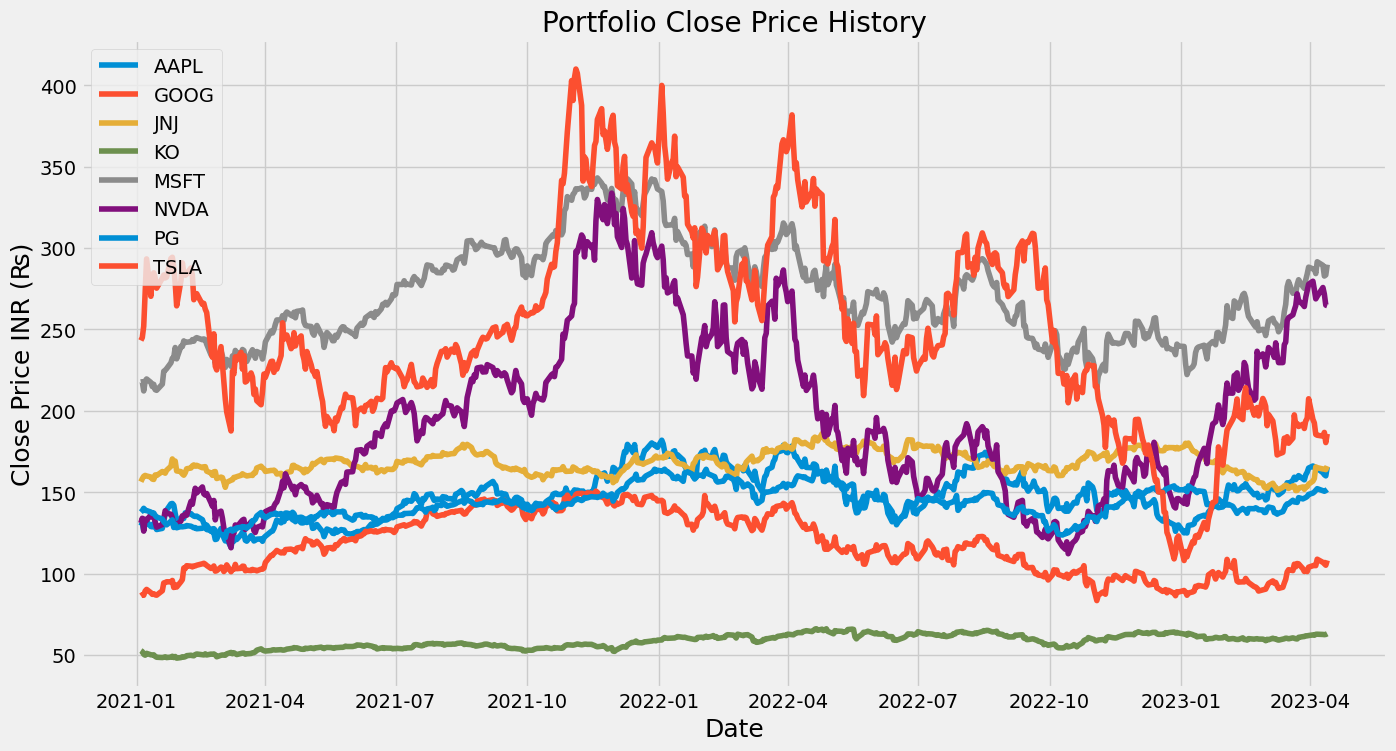

In [5]:
fig, ax = plt.subplots(figsize=(15,8))
for i in df.columns.values :
  ax.plot(df[i], label = i)
ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
ax.legend(df.columns.values , loc = 'upper left')
plt.show(fig)


# Correlation between companies

In [6]:
correlation_matrix = df.corr(method='pearson')
correlation_matrix

,AAPL,GOOG,JNJ,KO,MSFT,NVDA,PG,TSLA
AAPL,1.000000,0.496809,0.177671,0.549434,0.724097,0.712095,0.727981,0.613115
GOOG,0.496809,1.000000,0.121088,-0.051443,0.893375,0.684244,0.442964,0.657827
JNJ,0.177671,0.121088,1.000000,0.553310,0.067424,-0.093171,0.463237,0.011737
KO,0.549434,-0.051443,0.553310,1.000000,0.169931,0.207376,0.668590,-0.035562
MSFT,0.724097,0.893375,0.067424,0.169931,1.000000,0.887252,0.630180,0.683100
NVDA,0.712095,0.684244,-0.093171,0.207376,0.887252,1.000000,0.642729,0.514224
PG,0.727981,0.442964,0.463237,0.668590,0.630180,0.642729,1.000000,0.369697
TSLA,0.613115,0.657827,0.011737,-0.035562,0.683100,0.514224,0.369697,1.000000


Correlation between Stocks in your portfolio


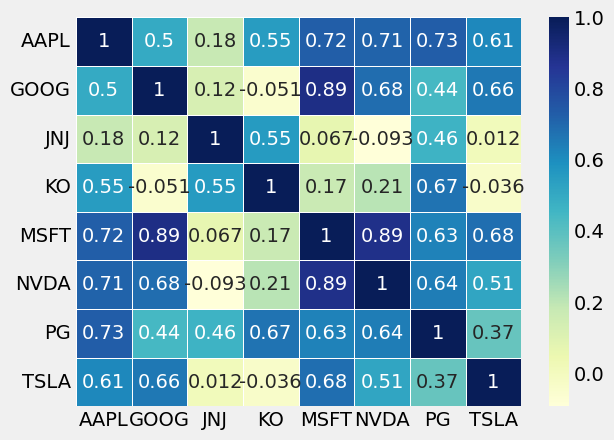

In [7]:
fig1 = plt.figure()
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show(fig1)


# Daily Returns

In [8]:
daily_simple_return = df.pct_change(1)
daily_simple_return.dropna(inplace=True)
daily_simple_return

,AAPL,GOOG,JNJ,KO,MSFT,NVDA,PG,TSLA
ds,,,,,,,,
2021-01-05,0.012364,0.007337,0.011757,-0.010993,0.000965,0.022210,0.006385,0.007317
2021-01-06,-0.033662,-0.003234,0.009410,-0.031813,-0.025929,-0.058953,0.010526,0.028390
2021-01-07,0.034123,0.029943,0.003379,-0.011085,0.028457,0.057830,-0.009346,0.079447
2021-01-08,0.008631,0.011168,-0.002058,0.022418,0.006093,-0.005040,-0.000432,0.078403
2021-01-11,-0.023249,-0.022405,-0.004186,-0.017228,-0.009699,0.025966,-0.006773,-0.078214
...,...,...,...,...,...,...,...,...
2023-04-06,0.005496,0.037637,-0.002778,0.000637,0.025533,0.005803,0.006347,-0.002480
2023-04-10,-0.015972,-0.017906,-0.005026,-0.002387,-0.007579,0.020047,-0.008277,-0.002972
2023-04-11,-0.007591,-0.007761,-0.000304,-0.001755,-0.022668,-0.014866,-0.001987,0.012357


Daily simple returns


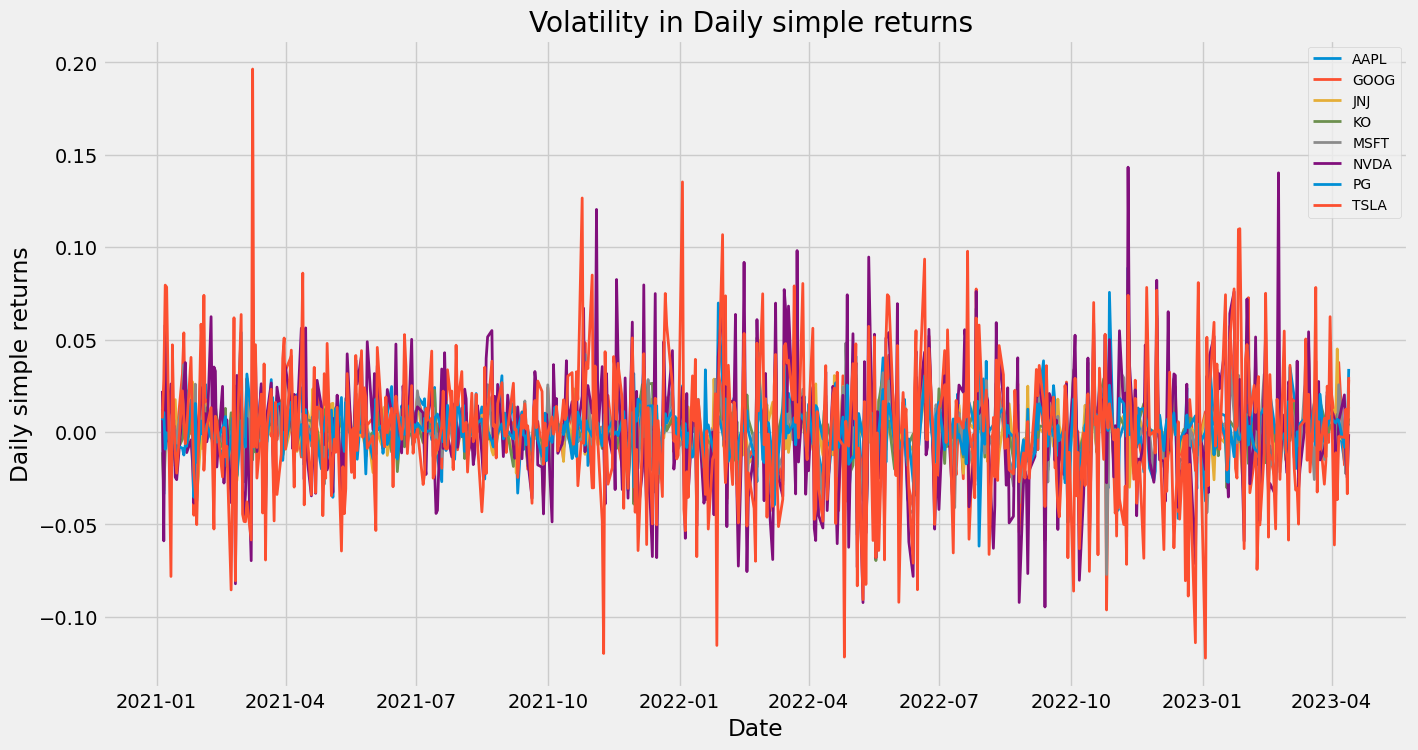

In [9]:
print('Daily simple returns')
fig, ax = plt.subplots(figsize=(15,8))


for i in daily_simple_return.columns.values :
    ax.plot(daily_simple_return[i], lw =2 ,label = i)


ax.legend( loc = 'upper right' , fontsize =10)
ax.set_title('Volatility in Daily simple returns ')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)


In [10]:
print('Average Daily returns(%) of stocks in your portfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)


Average Daily returns(%) of stocks in your portfolio
AAPL    0.061058
GOOG    0.060889
JNJ     0.015644
KO      0.037247
MSFT    0.066953
NVDA    0.182080
PG      0.023532
TSLA    0.028906
dtype: float64


<Axes: title={'center': 'Risk Box Plot'}>

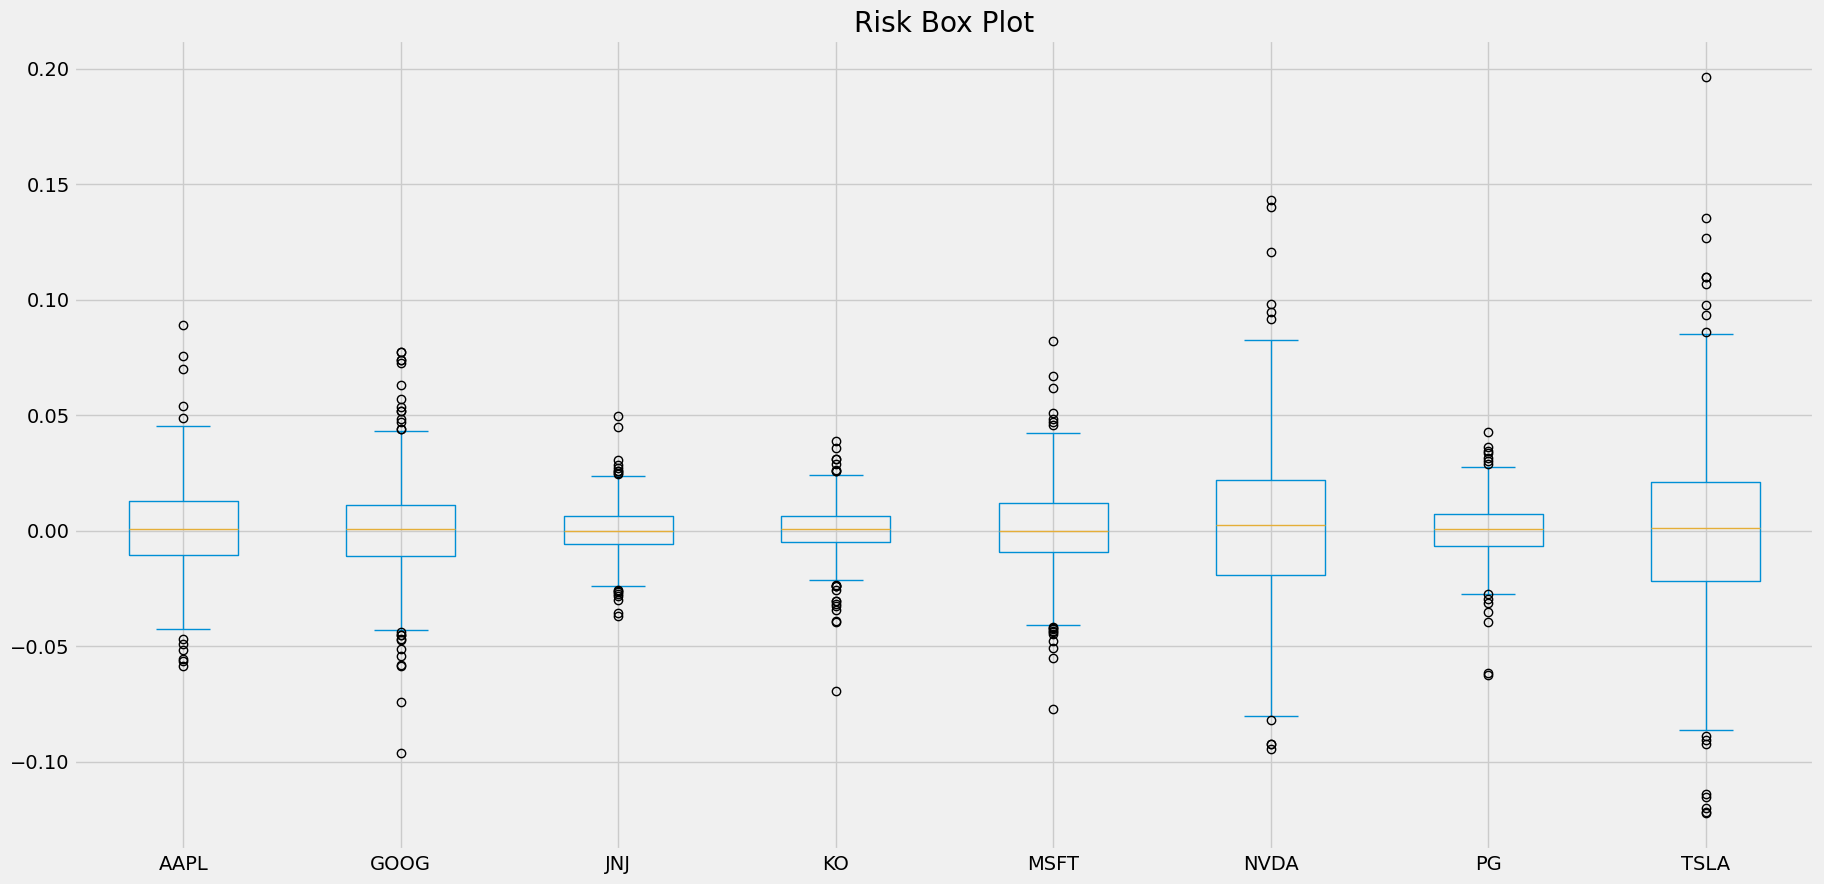

In [11]:
daily_simple_return.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")


In [12]:
print('Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.')
print(daily_simple_return.std() * np.sqrt(252) * 100)

Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.
AAPL    30.153866
GOOG    33.030218
JNJ     16.250391
KO      17.095918
MSFT    29.212248
NVDA    54.860370
PG      18.318102
TSLA    61.954197
dtype: float64


## *Return per unit risk*

In [13]:
Avg_daily / (daily_simple_return.std() * np.sqrt(252)) *100

AAPL    0.202487
GOOG    0.184343
JNJ     0.096268
KO      0.217872
MSFT    0.229195
NVDA    0.331897
PG      0.128462
TSLA    0.046656
dtype: float64

## Cumulative returns

In [14]:
daily_cummulative_simple_return =(daily_simple_return+1).cumprod()
daily_cummulative_simple_return

,AAPL,GOOG,JNJ,KO,MSFT,NVDA,PG,TSLA
ds,,,,,,,,
2021-01-05,1.012364,1.007337,1.011757,0.989007,1.000965,1.022210,1.006385,1.007317
2021-01-06,0.978286,1.004079,1.021278,0.957544,0.975010,0.961948,1.016979,1.035915
2021-01-07,1.011668,1.034145,1.024728,0.946929,1.002756,1.017577,1.007474,1.118215
2021-01-08,1.020400,1.045694,1.022620,0.968158,1.008866,1.012449,1.007038,1.205887
2021-01-11,0.996677,1.022265,1.018339,0.951478,0.999081,1.038739,1.000218,1.111569
...,...,...,...,...,...,...,...,...
2023-04-06,1.272390,1.260242,1.055272,1.191054,1.339520,2.061768,1.104484,0.760760
2023-04-10,1.252067,1.237675,1.049968,1.188211,1.329367,2.103100,1.095342,0.758499
2023-04-11,1.242562,1.228070,1.049649,1.186126,1.299233,2.071834,1.093165,0.767872


Cummulative Returns


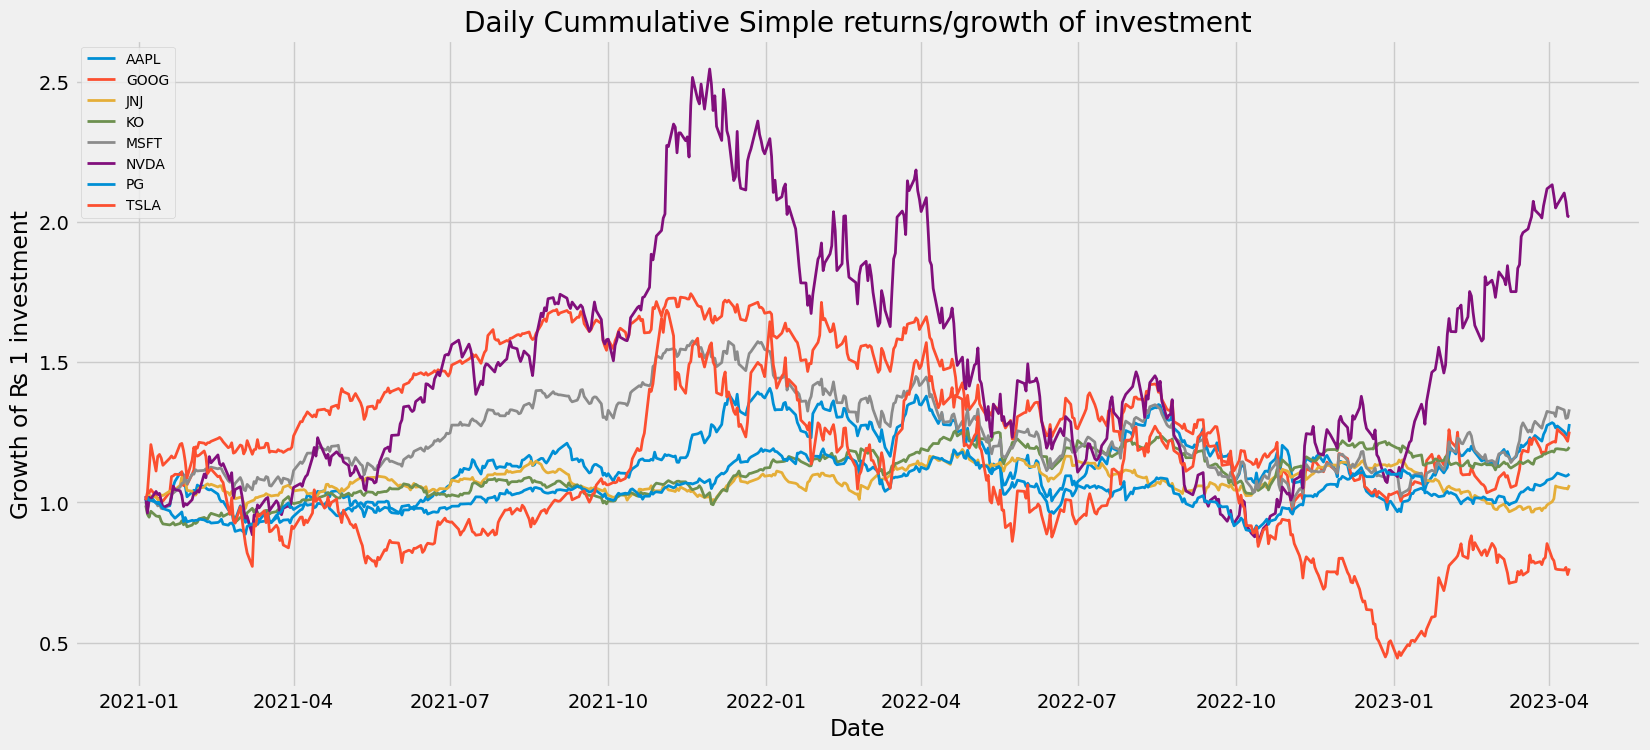

In [15]:
#visualize the daily cummulative simple return
print('Cummulative Returns')
fig, ax = plt.subplots(figsize=(18,8))

for i in daily_cummulative_simple_return.columns.values :
    ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper left' , fontsize =10)
ax.set_title('Daily Cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of ₨ 1 investment')
plt.show(fig)



```
# Building an ideal portfolio

1.   List item
2.   List item


```



In [16]:
!pip install pyportfolioopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 KB 2.5 MB/s eta 0:00:00


In [17]:
plt.style.use('fivethirtyeight')

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import  risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


In [18]:
mean = expected_returns.mean_historical_return(df)

S = risk_models.sample_cov(df) # for sample covariance matrix
S

,AAPL,GOOG,JNJ,KO,MSFT,NVDA,PG,TSLA
AAPL,0.090926,0.069699,0.013865,0.020932,0.066769,0.110287,0.018957,0.106068
GOOG,0.069699,0.109100,0.011978,0.017438,0.076969,0.116425,0.016468,0.090173
JNJ,0.013865,0.011978,0.026408,0.013931,0.012501,0.009193,0.016569,0.004645
KO,0.020932,0.017438,0.013931,0.029227,0.019431,0.020340,0.021648,0.012210
MSFT,0.066769,0.076969,0.012501,0.019431,0.085336,0.113735,0.019025,0.086404
NVDA,0.110287,0.116425,0.009193,0.020340,0.113735,0.300966,0.018783,0.197791
PG,0.018957,0.016468,0.016569,0.021648,0.019025,0.018783,0.033555,0.006729
TSLA,0.106068,0.090173,0.004645,0.012210,0.086404,0.197791,0.006729,0.383832


Covariance between daily simple returns of stocks in your portfolio


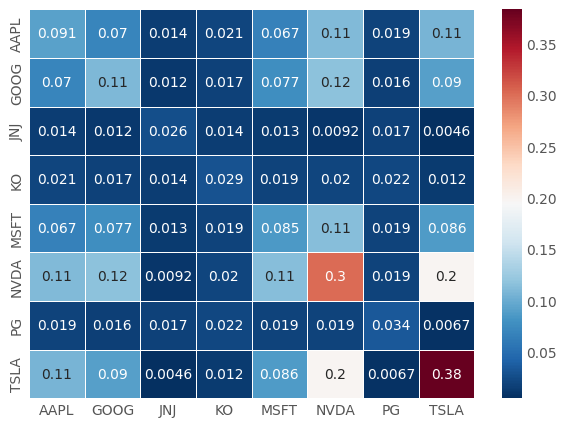

In [19]:
plt.style.use('ggplot')
fig = plt.figure()
sb.heatmap(S,xticklabels=S.columns, yticklabels=S.columns,
cmap='RdBu_r', annot=True, linewidth=0.5)
print('Covariance between daily simple returns of stocks in your portfolio')
plt.show(fig)

Portfolio Allocation


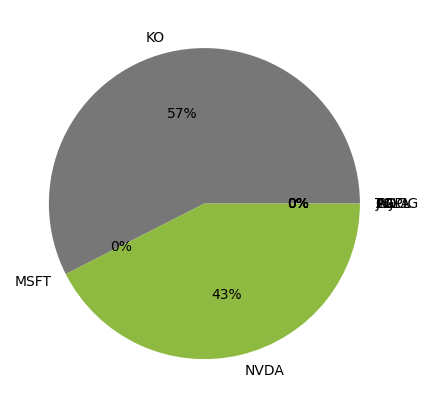

{'KO': 91, 'NVDA': 16}


In [34]:
ef = EfficientFrontier(mean,S)
weights = ef.max_sharpe() #for maximizing the Sharpe ratio #Optimization
cleaned_weights = ef.clean_weights() #to clean the raw weights
# Get the Keys and store them in a list
labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
values = list(cleaned_weights.values())
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%')
print('Portfolio Allocation')
plt.show(fig)

In [21]:
ef.portfolio_performance(verbose=True)

Expected annual return: 20.1%
Annual volatility: 27.2%
Sharpe Ratio: 0.67


(0.20149087374443622, 0.27202858391527995, 0.6671757472404422)

In [46]:
portfolio_amount = float(input("Enter the amount you want to invest: "))
if portfolio_amount != '' :
    # Get discrete allocation of each share per stock

    latest_prices = get_latest_prices(df)
    weights = cleaned_weights

    discrete_allocation = DiscreteAllocation(weights, latest_prices , total_portfolio_value = float(portfolio_amount))
    allocation , leftover = discrete_allocation.lp_portfolio()
    print(discrete_allocation)
    discrete_allocation_list = []


    for symbol in allocation:
        discrete_allocation_list.append(allocation.get(symbol))


    portfolio_df = pd.DataFrame(columns =['Ticker' , 'Number of stocks to buy'])

    portfolio_df['Ticker'] = allocation
    portfolio_df['Number of stocks to buy'] = discrete_allocation_list
    print('Number of stocks to buy with the amount of $ ' + str(portfolio_amount))
    print(portfolio_df)
    print('Funds remaining with you will be: $' , int(leftover))


Enter the amount you want to invest: 10000
Number of stocks to buy with the amount of $ 10000.0
     Ticker  Number of stocks to buy
KO       KO                       91
NVDA   NVDA                       16
Funds remaining with you will be: $ 19
